## importing dependencies

In [5]:
import seaborn as sns
from scipy import stats
import warnings
import dabl
import evidently
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("RTA.csv") # loading data set

In [9]:
reserved_original_dataset=df.copy(deep=True) # reserving the original copy of data set

In [10]:
df.info() # Basic info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [11]:
df.describe().T # only integers

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [12]:
df.describe(include="O").T # all categories stats

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [37]:
missing_val=round((df.isna().sum()/df.shape[0])*100,2) # percentage of missing values
missing_val

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.02
Vehicle_driver_relation         4.70
Driving_experience              6.73
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        31.89
Defect_of_vehicle              35.95
Area_accident_occured           1.94
Lanes_or_Medians                3.13
Road_allignment                 1.15
Types_of_Junction               7.20
Road_surface_type               1.40
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.26
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.50
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
W

In [39]:
for i,j in missing_val.items():
    if j > 0:
        print(i," "*10,j)

Educational_level            6.02
Vehicle_driver_relation            4.7
Driving_experience            6.73
Type_of_vehicle            7.71
Owner_of_vehicle            3.91
Service_year_of_vehicle            31.89
Defect_of_vehicle            35.95
Area_accident_occured            1.94
Lanes_or_Medians            3.13
Road_allignment            1.15
Types_of_Junction            7.2
Road_surface_type            1.4
Type_of_collision            1.26
Vehicle_movement            2.5
Work_of_casuality            25.97
Fitness_of_casuality            21.39


In [40]:
# Service_year_of_vehicle, Defect_of_vehicle, Work_of_casuality has more missing values but lets see it later

In [41]:
# Thers is "na" value in some columns, lets find them

In [49]:
na_in_columns=round(df.isin(["na"]).sum()/df.shape[0]*100,2)

In [50]:
for i,j in na_in_columns.items():
    if j > 0:
        print(i," "*10,j)

Casualty_class            36.08
Sex_of_casualty            36.08
Age_band_of_casualty            36.08
Casualty_severity            36.08


In [51]:
# so we have 4 columns having "na" values let see it later

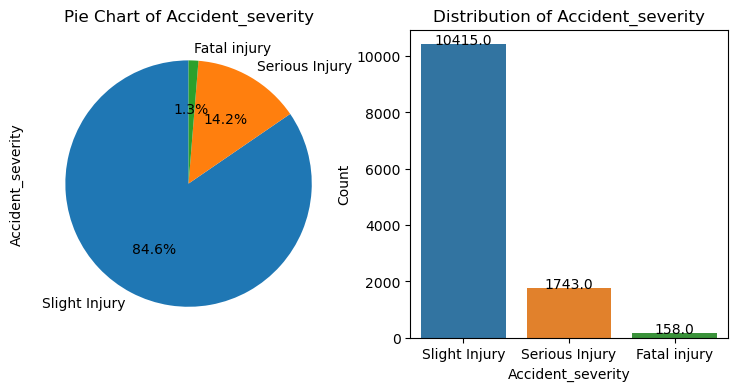

In [58]:
target_variable = 'Accident_severity'

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Pie chart for the target variable
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title(f'Pie Chart of {target_variable}')

# Bar graph with count labels on top of each bar
sns.countplot(data=df, x=target_variable, ax=axes[1])
axes[1].set_title(f'Distribution of {target_variable}')
axes[1].set_xlabel(target_variable)
axes[1].set_ylabel('Count')

# Display the count labels on top of each bar in the bar graph
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].text(patch.get_x() + patch.get_width() / 2, height + 0.3, f'{height}', ha='center')

# Display the plots
plt.show()

In [59]:
# above fig shows that the output variable or target is highly imbalance

In [65]:
# converting 'time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# date (day-month-year) time
df["Time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

In [67]:
df.head(7)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6
5,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury,14,15
6,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury,17,30


Number of Categorical Variables: 29


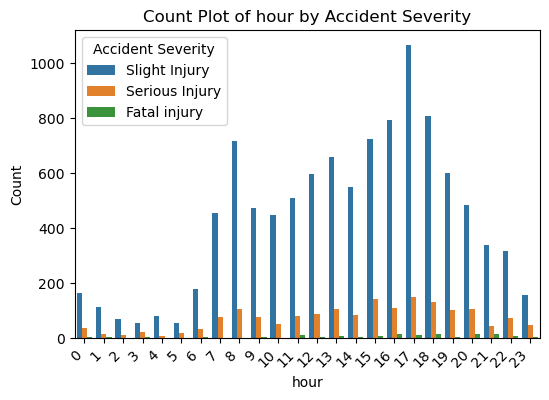

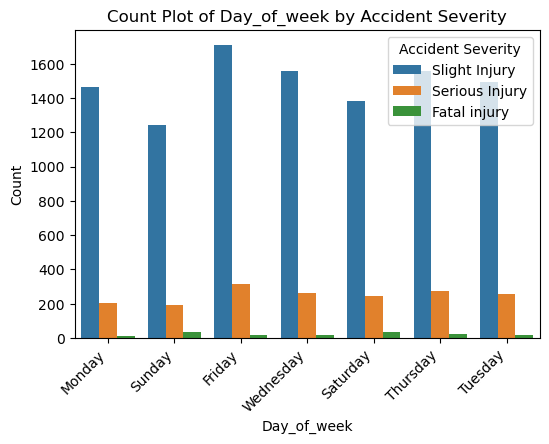

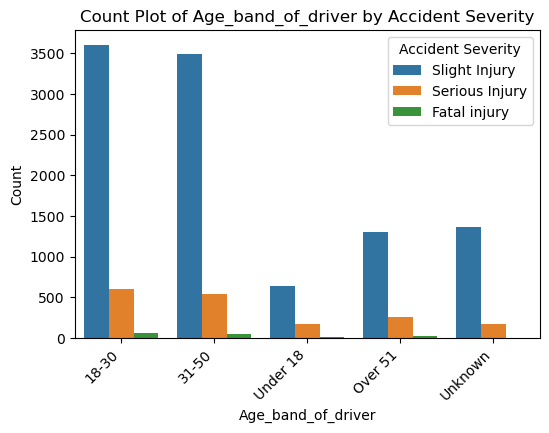

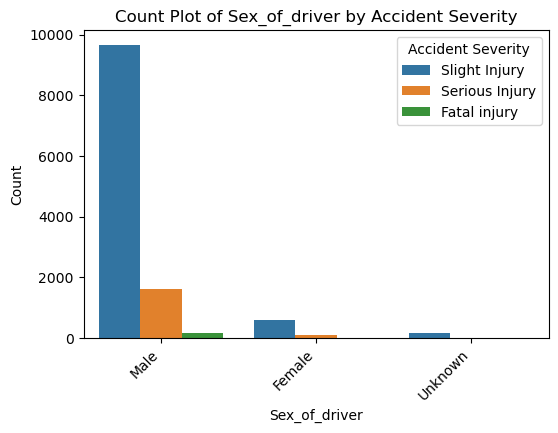

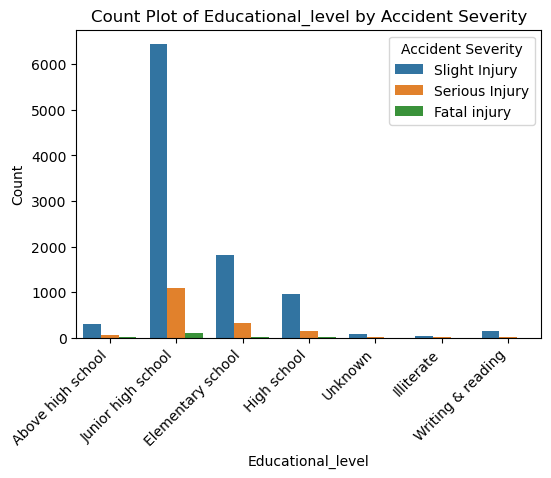

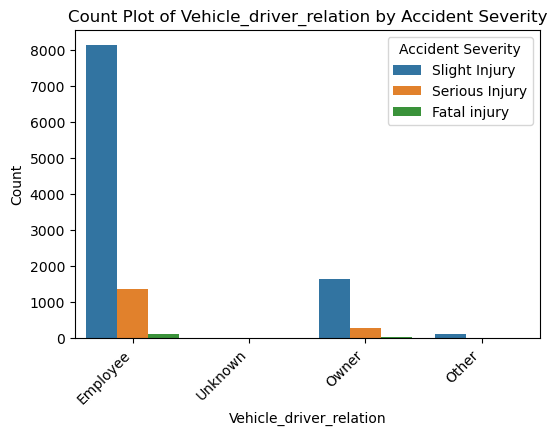

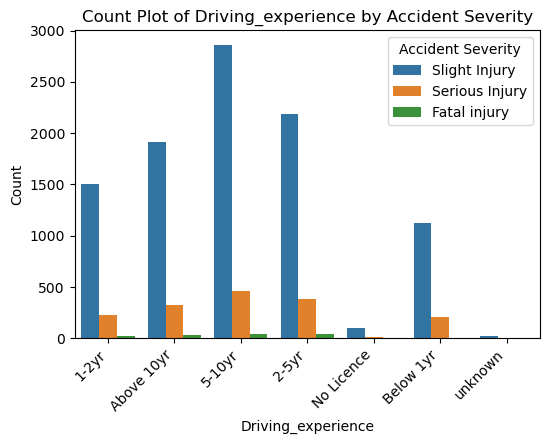

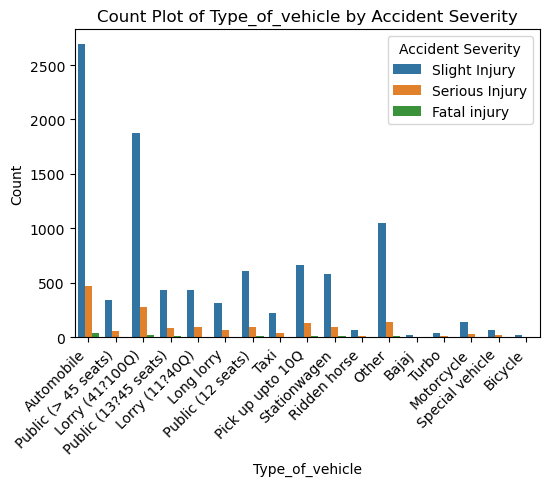

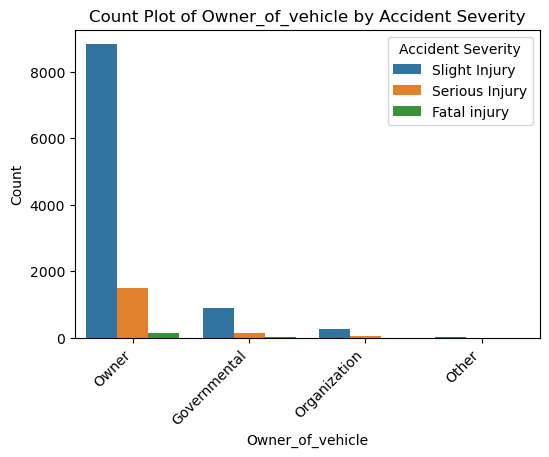

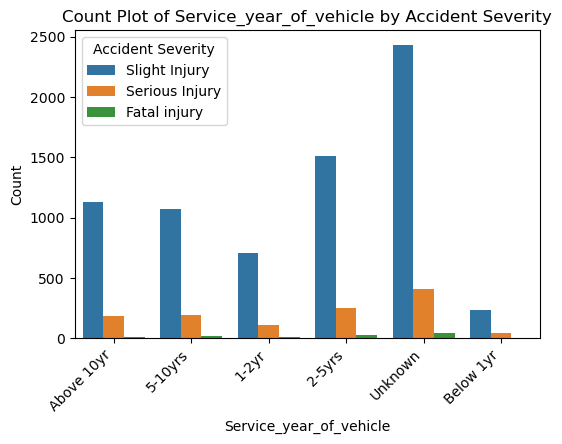

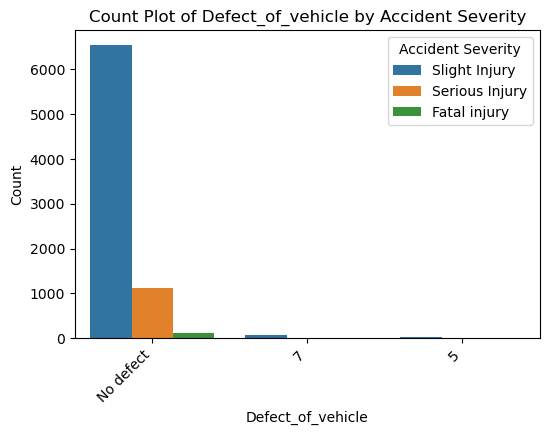

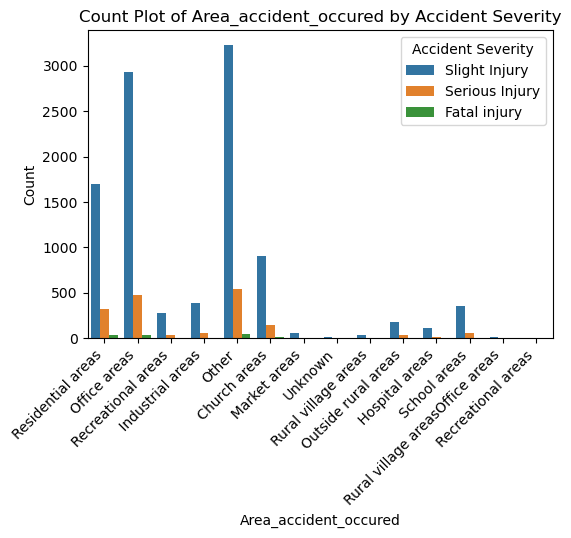

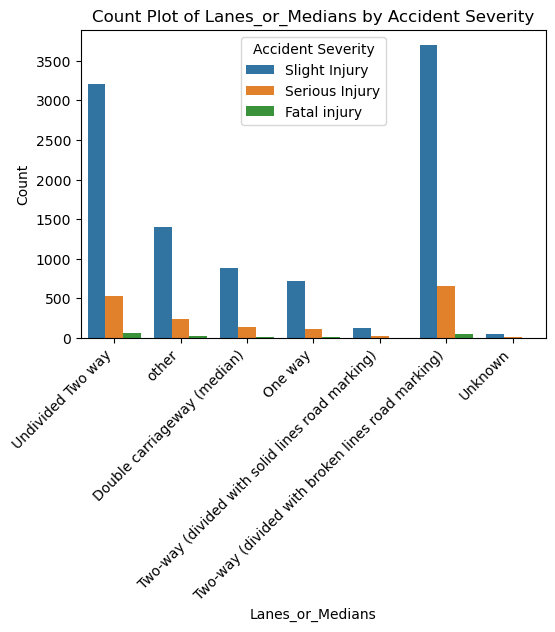

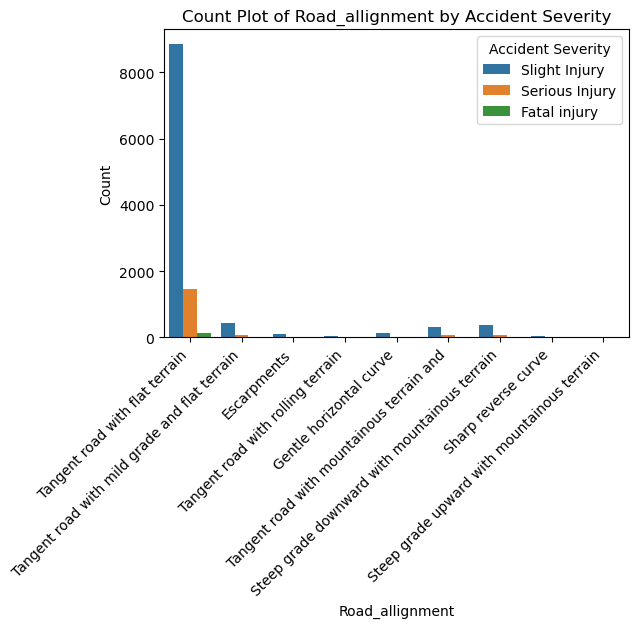

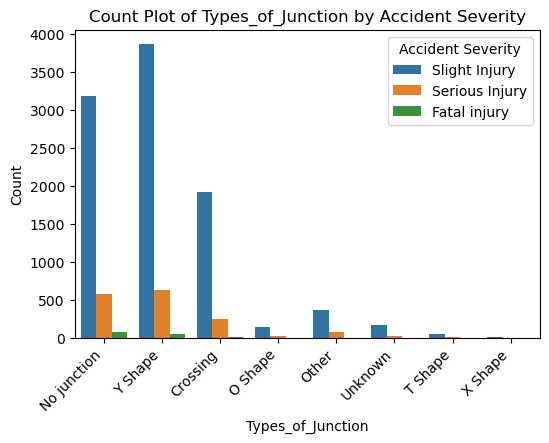

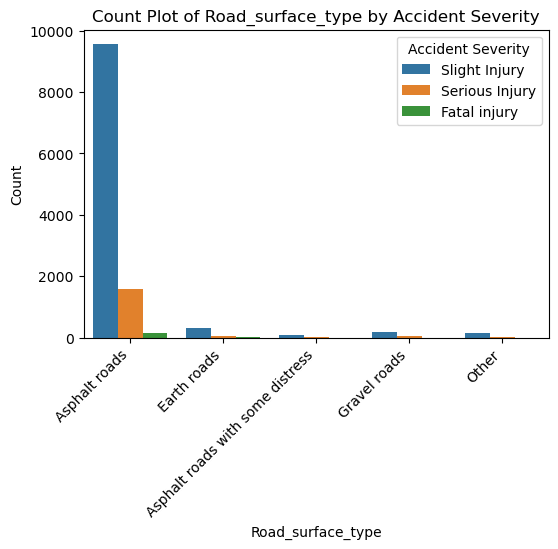

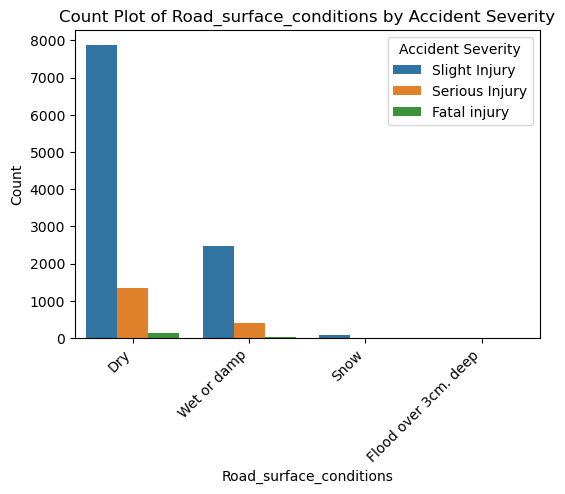

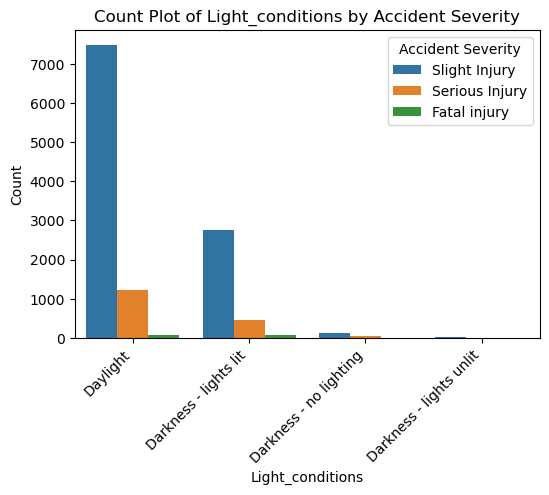

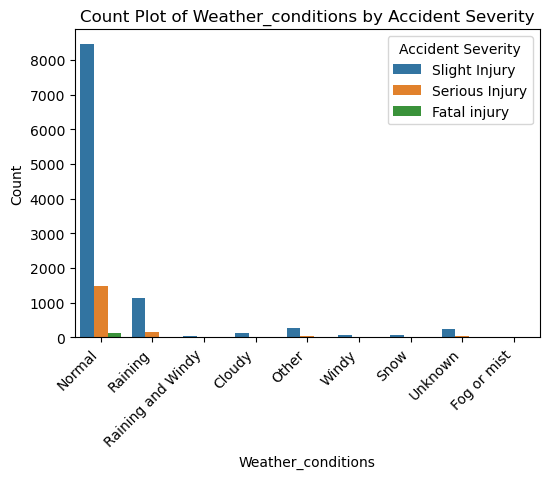

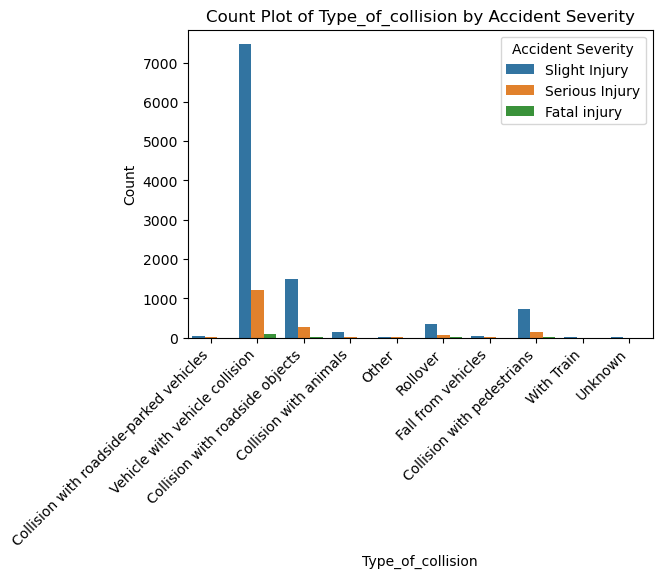

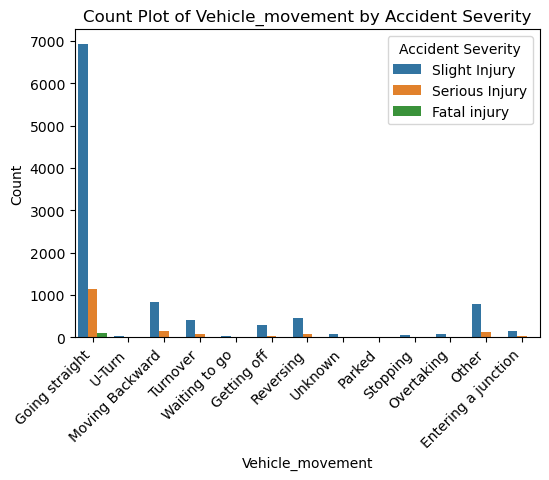

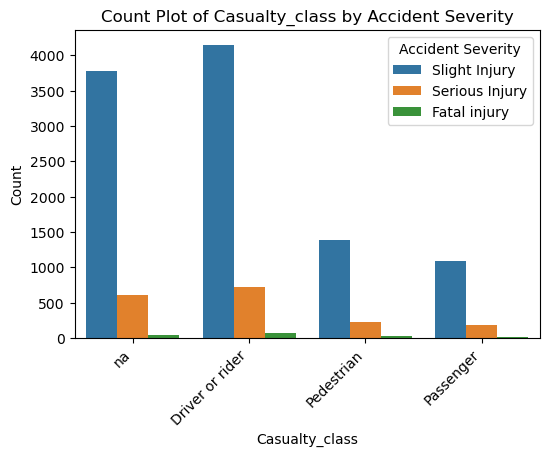

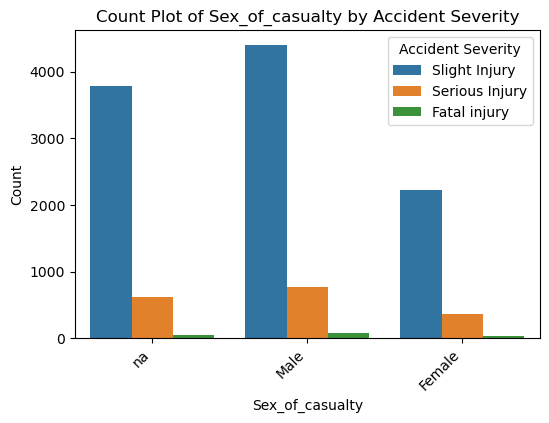

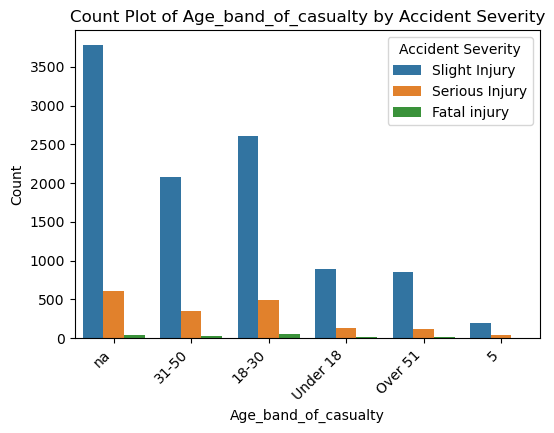

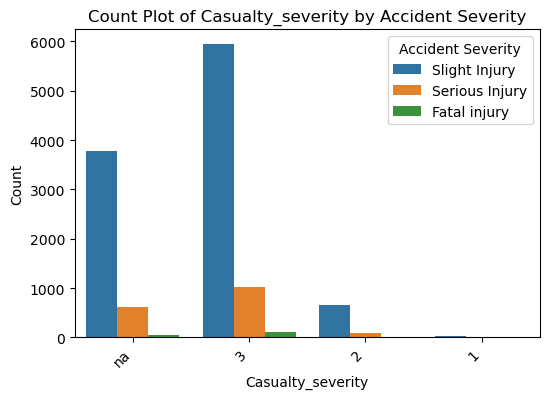

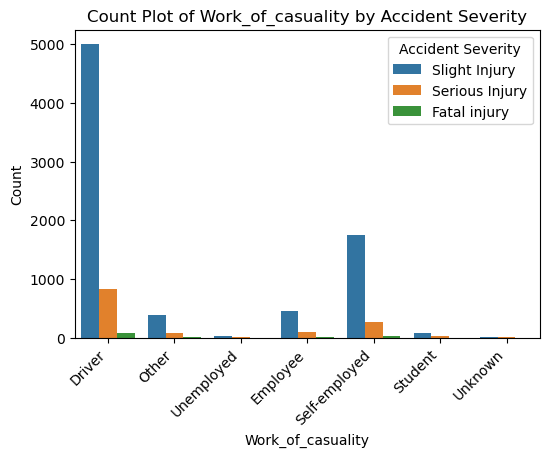

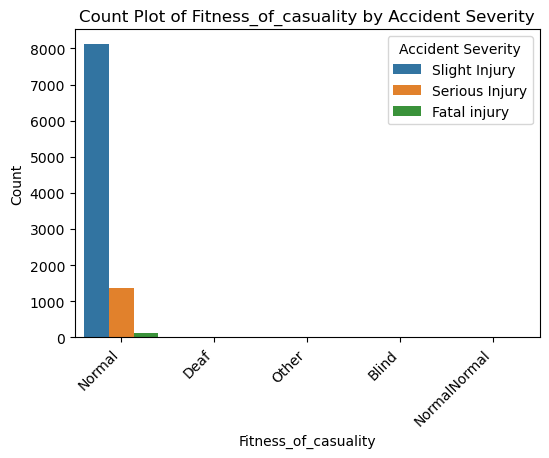

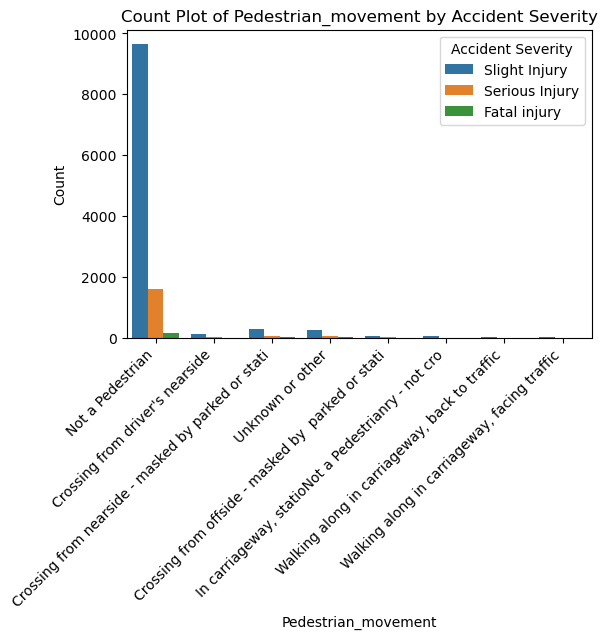

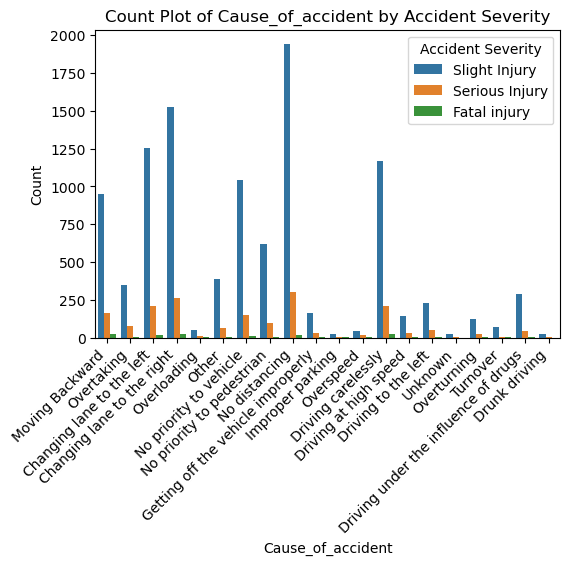

In [70]:
# graphically visualising different variable w.r.t target variable
# Extracting categorical columns from the dataset, apart from 2 columns, rest
# all 29 are categorical variables
categorical_cols = [
    'hour','Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
    'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
    'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident'
]

# Print the number of categorical variables
num_categorical_vars = len(categorical_cols)
print(f"Number of Categorical Variables: {num_categorical_vars}")

# Plotting count plot for target variable against each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))

    # Limit the displayed categorical values to the first 50 characters
    df[col] = df[col].apply(lambda x: x[:50] if isinstance(x, str) and len(x) > 50 else x)

    sns.countplot(x=col, hue='Accident_severity', data=df)
    plt.title(f'Count Plot of {col} by Accident Severity')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Accident Severity')
    plt.show()

In [83]:
df=df.drop['Fitness_of_casuality']

TypeError: 'method' object is not subscriptable

In [81]:
df.isna().sum()/df.shape[0]*100

Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Fitness_of_casuality           21.394933
Pedestrian_movement             0.000000
Cause_of_accident               0.000000
Accident_severity               0.000000
hour            

In [80]:
df=df.drop(columns=['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity'])

In [84]:
df=df.drop(columns=['Fitness_of_casuality'])

In [85]:
df.isna().sum()/df.shape[0]*100

Day_of_week                    0.000000
Age_band_of_driver             0.000000
Sex_of_driver                  0.000000
Educational_level              6.016564
Vehicle_driver_relation        4.701202
Driving_experience             6.731082
Type_of_vehicle                7.713543
Owner_of_vehicle               3.913608
Area_accident_occured          1.940565
Lanes_or_Medians               3.126015
Road_allignment                1.152972
Types_of_Junction              7.202014
Road_surface_type              1.396557
Road_surface_conditions        0.000000
Light_conditions               0.000000
Weather_conditions             0.000000
Type_of_collision              1.258525
Number_of_vehicles_involved    0.000000
Number_of_casualties           0.000000
Vehicle_movement               2.500812
Pedestrian_movement            0.000000
Cause_of_accident              0.000000
Accident_severity              0.000000
hour                           0.000000
minute                         0.000000


In [86]:
df=df.dropna()

In [157]:
df.isna().sum()/df.shape[0]*100

Day_of_week                    0.0
Age_band_of_driver             0.0
Sex_of_driver                  0.0
Educational_level              0.0
Vehicle_driver_relation        0.0
Driving_experience             0.0
Type_of_vehicle                0.0
Owner_of_vehicle               0.0
Area_accident_occured          0.0
Lanes_or_Medians               0.0
Road_allignment                0.0
Types_of_Junction              0.0
Road_surface_type              0.0
Road_surface_conditions        0.0
Light_conditions               0.0
Weather_conditions             0.0
Type_of_collision              0.0
Number_of_vehicles_involved    0.0
Number_of_casualties           0.0
Vehicle_movement               0.0
Pedestrian_movement            0.0
Cause_of_accident              0.0
Accident_severity              0.0
hour                           0.0
minute                         0.0
dtype: float64

In [158]:
df.shape

(8439, 25)

In [160]:
# checking counts of different formated variable
numerical_feature = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(X_train[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in X_train.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 4
Discrete feature Count 3
Continuous feature Count 1
Categorical feature Count 20


In [161]:
df_encoded = pd.get_dummies(df, columns=categorical_feature, drop_first=True)

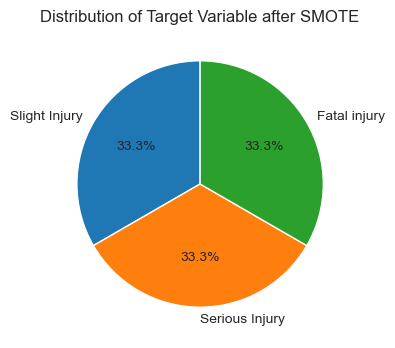

In [162]:
#  We will use SMOTE technique to balance the dataset
X = df_encoded.drop(columns=['Accident_severity'])
y = df_encoded['Accident_severity']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display a pie chart to show the balance after SMOTE
plt.figure(figsize=(4, 4))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Apply SelectKBest with K=50. Value 50 was arrived at after few iterations
# testing
X_temp = X_resampled
y_temp = y_resampled

k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X_temp, y_temp)

# Get the names of the selected columns
selected_columns = X_temp.columns[k_best.get_support(indices=True)]

# Display the selected column names
print("Selected Columns:", selected_columns)

Selected Columns: Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute',
       'Day_of_week_Monday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Unknown',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Educational_level_Junior high school', 'Vehicle_driver_relation_Owner',
       'Driving_experience_2-5yr', 'Driving_experience_5-10yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_Public (12 seats)',
       'Type_of_vehicle_Public (> 45 seats)', 'Type_of_vehicle_Stationwagen',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_ Industrial areas',
       'Area_accident_occured_Office areas', 'Area_accident_occured_Other',
       'Area_accident_occured_Residential areas',
       'Area_accid

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)


In [167]:
# Defining below the 5 models selected for training
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
}

In [170]:
from sklearn.preprocessing import StandardScaler
# Train and evaluate models
for name, model in models.items():
    if name == 'LogisticRegression':
        # Scale the data for Logistic Regression, it wasn't converging otherwise
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    # Training set metrics
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')

    # Testing set metrics
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')

    # Confusion matrices
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)

    # Append metrics to dictionaries
    train_metrics['Model'].append(name)
    train_metrics['Accuracy'].append(train_accuracy)
    train_metrics['Precision'].append(train_precision)
    train_metrics['Recall'].append(train_recall)
    train_metrics['F1 Score'].append(train_f1)
    train_metrics['Confusion Matrix'].append(cm_train)

    test_metrics['Model'].append(name)
    test_metrics['Accuracy'].append(test_accuracy)
    test_metrics['Precision'].append(test_precision)
    test_metrics['Recall'].append(test_recall)
    test_metrics['F1 Score'].append(test_f1)
    test_metrics['Confusion Matrix'].append(cm_test)

In [171]:
# Display the training and testing metrics in tables
train_df = pd.DataFrame(train_metrics).set_index('Model')
test_df = pd.DataFrame(test_metrics).set_index('Model')

print("Training Set Metrics:")
print(train_df)

print("\nTesting Set Metrics:")
print(test_df)


Training Set Metrics:
                    Accuracy  Precision    Recall  F1 Score  \
Model                                                         
RandomForest        0.999709   0.999709  0.999709  0.999709   
GradientBoosting    0.861901   0.861316  0.861901  0.859927   
RandomForest        0.999709   0.999709  0.999709  0.999709   
GradientBoosting    0.861901   0.861316  0.861901  0.859927   
LogisticRegression  0.371171   0.548021  0.371171  0.242273   
SVM                 0.768265   0.763308  0.768265  0.763625   
DecisionTree        0.999709   0.999709  0.999709  0.999709   

                                                     Confusion Matrix  
Model                                                                  
RandomForest               [[5735, 4, 0], [1, 5746, 0], [0, 0, 5719]]  
GradientBoosting    [[5266, 407, 66], [611, 4281, 855], [72, 365, ...  
RandomForest               [[5735, 4, 0], [1, 5746, 0], [0, 0, 5719]]  
GradientBoosting    [[5266, 407, 66], [611, 4281, 

In [172]:
# confusion matrix display

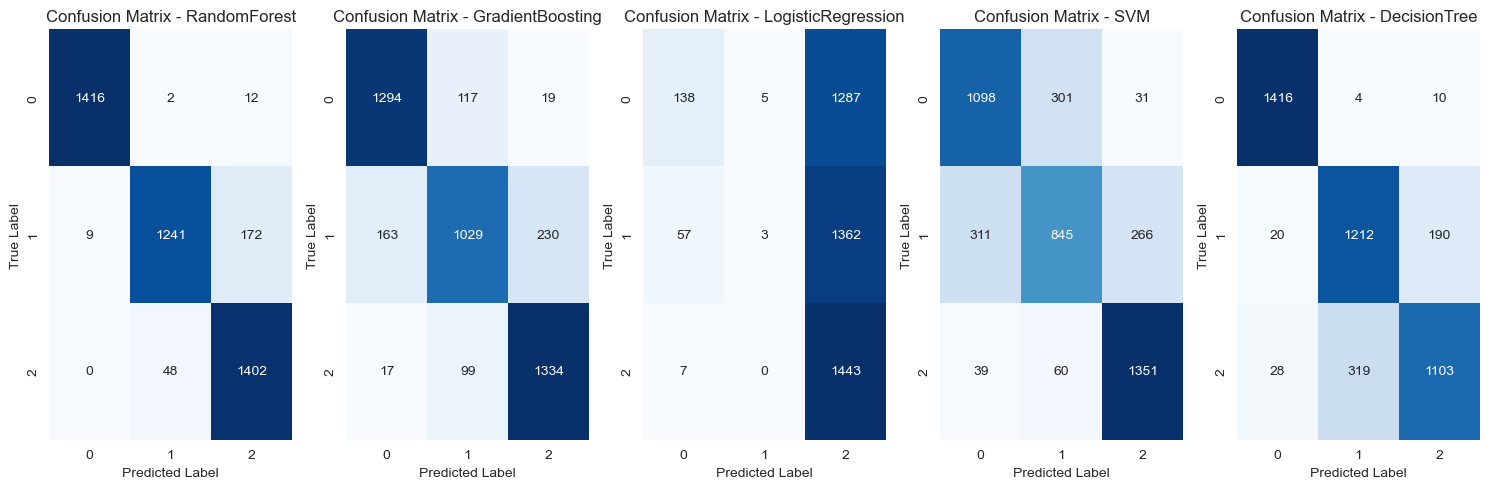

In [173]:
# Set up subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

# Evaluate models
for i, (name, model) in enumerate(models.items()):
    # Extract confusion matrix from the test metrics
    cm = test_metrics['Confusion Matrix'][test_metrics['Model'].index(name)]

    # Plot the confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

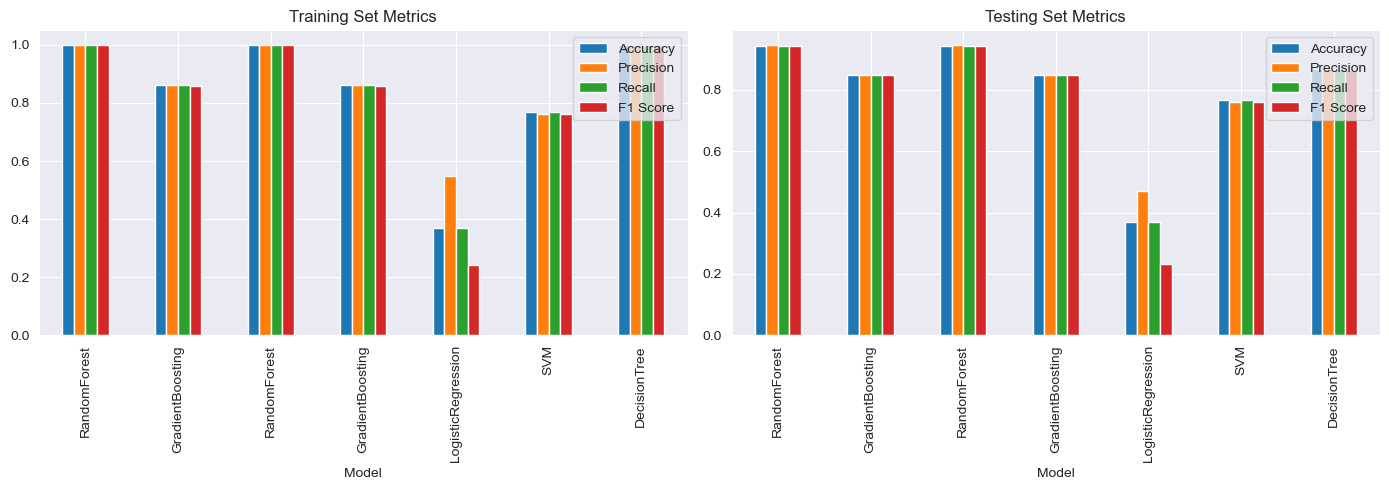

In [174]:
# Display metrics in a bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for training set metrics
train_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set Metrics')

# Bar chart for testing set metrics
test_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Testing Set Metrics')

plt.tight_layout()
plt.show()

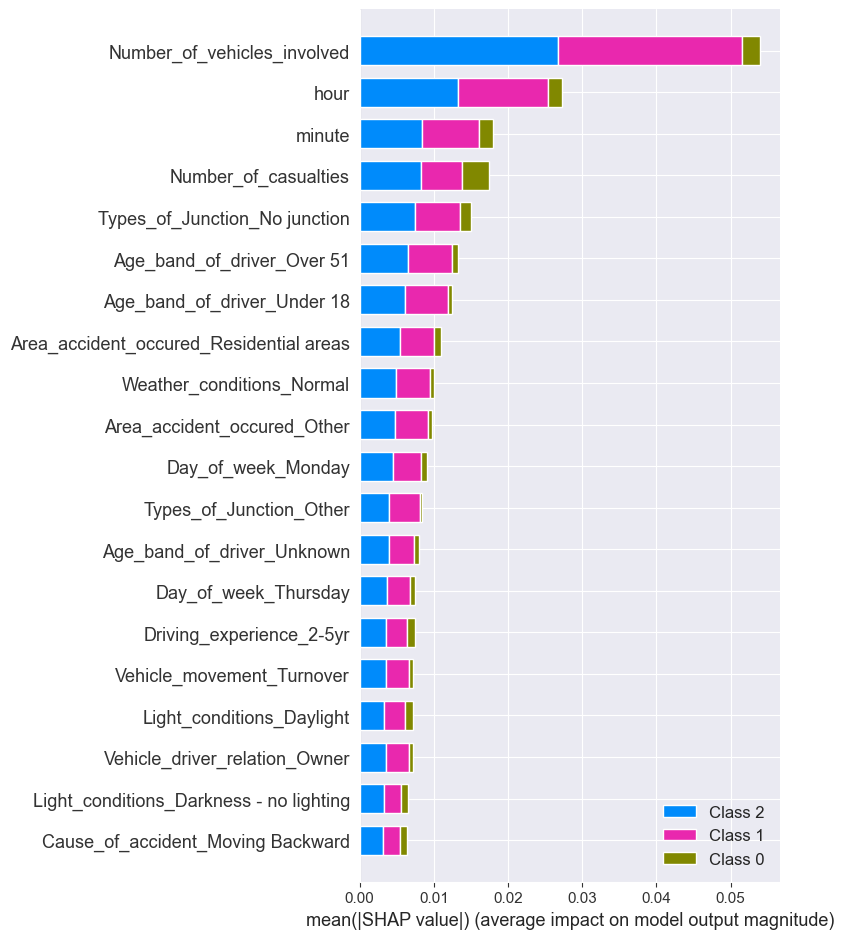

In [177]:
import shap # for explainable AI
# Assuming X_train and y_train as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming rf_model is your trained RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a set of samples (e.g., the first 100 samples in the test set)
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Plot the summary plot
shap.summary_plot(shap_values, X_test.iloc[:100, :])